# Credit Card Fraud Detection
----

## About The Dataset:

#### <ins>Context:</ins>

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### <ins>Content:</ins> 

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

#### [Dataset Link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)


## The Index:
1. [The dependencies](#1)
2. [Explorirng the data](#2)
3. [Data counting and fraud percentage](#3)
3. [Case amount stats](#4)
3. [Distributions](#5)
3. [Scaling the amount](#6)
3. [Data spliting](#7)
3. [The Metrics](#8)
3. [Classification algorithms](#9)
3. [Performance comparaisons](#10)
3. [useful links](#11)

## <a name="1">Importing the dependencies:</a>

In [113]:
import pandas as pd # data analysis and manipulation
import numpy as np #  arrays manipulation
import matplotlib.pyplot as plt # to create visualizations
from termcolor import colored as cl # Color formatting for output in terminal
import seaborn as sns # data vizualization based on matplotlib

from imblearn.over_sampling import SMOTE #Oversampling for Imbalanced Classification (duplicate examples from the minority class)

import warnings # ignore warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets

## scaling
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.preprocessing import MinMaxScaler # data scaling
from sklearn.model_selection import train_test_split # data split

## Algorithms
from sklearn.tree import DecisionTreeClassifier # decision tree classifier
from sklearn.neighbors import KNeighborsClassifier # k-nearest neighbors
from sklearn.linear_model import LogisticRegression # Logistic regression 
from sklearn.ensemble import RandomForestClassifier # random forest classifier
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.naive_bayes import GaussianNB #Gaussian Naive Bayes
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron classifier
from sklearn.svm import SVC # C-Support Vector Classification

from sklearn import metrics

import time

from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.svm import LinearSVC

## <a name="2">Exploring the data:</a>

In [114]:
total_time = time.time()


df = pd.read_csv(r'archive/creditcard.csv') #importing data
df.head() #First 5 columns of our data
df = df.loc[1:30000] # limit data to first 10.000 cols
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,35730.0,-0.554209,0.726242,1.432987,1.450071,0.692002,0.515234,0.644546,0.279277,-0.911600,...,-0.133564,-0.521623,-0.113371,-0.579925,0.233476,-0.202655,-0.032443,-0.006434,46.35,0
29997,35730.0,0.992504,-0.753256,1.118907,0.196083,-1.249378,0.278200,-0.852155,0.398354,1.153303,...,-0.122019,-0.306125,0.087525,0.272108,-0.067902,0.940444,-0.042313,0.010183,69.32,0
29998,35731.0,-1.065322,2.226113,1.031873,2.765116,0.447476,0.555779,-0.605831,-2.384328,-2.056265,...,-1.466784,-0.198682,-0.160174,-0.168171,0.040714,0.127506,0.294972,0.205159,1.00,0
29999,35731.0,-0.832159,0.781149,1.809976,-0.159889,0.270252,0.047446,0.917996,0.215694,-0.760707,...,-0.075630,-0.454013,0.113747,-0.070213,-0.199448,-0.872304,0.085273,0.113791,66.55,0


In [115]:
df.shape #the dimensionality of our data

(30000, 31)

## <a name="3">Data counting and fraud percentage:</a>

In [116]:

cases = len(df) # get length of the dataset to conclude num of cases
nonfraud_count = len(df[df.Class == 0]) # count of non fraud cases
fraud_count = len(df[df.Class == 1]) # count of fraud cases
fraud_percentage = round(fraud_count/nonfraud_count*100, 2) # the percentage of fraud cases

print(cl('CASE COUNT : ', attrs = ['bold'],color='red'))
print(cl('--------------------------------------------', attrs = ['bold'],color='red'))
print('Total number of cases are :',end=" ")
print(cl('{}'.format(cases), attrs = ['bold'],color='green'))
print('Non-fraud cases are :',end=" ")
print(cl('{}'.format(nonfraud_count), attrs = ['bold'],color='green'))
print('Fraud cases are :',end=" ")
print(cl('{}'.format(fraud_count), attrs = ['bold'],color='green'))
print('Percentage of fraud cases is :',end=" ")
print(cl('{}%'.format(fraud_percentage), attrs = ['bold'],color='green'))
print(cl('--------------------------------------------', attrs = ['bold'],color='red'))


CASE COUNT : 
--------------------------------------------
Total number of cases are : 30000
Non-fraud cases are : 29906
Fraud cases are : 94
Percentage of fraud cases is : 0.31%
--------------------------------------------


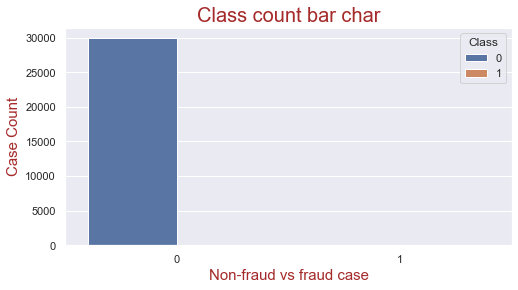

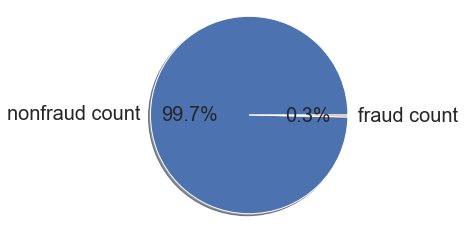

In [117]:
# A bar char representing the count of Non-fraud cases vs Fraud cases
plt.figure(figsize=(8,4),linewidth=0)
sns.set_theme(style="darkgrid")
sns.countplot(x="Class", hue="Class", data=df)
plt.title("Class count bar char", fontsize=20,color="brown")
plt.xlabel("Non-fraud vs fraud case", fontsize=15,color="brown")
plt.ylabel("Case Count", fontsize=15,color="brown")


# Pie chart, where the slices will be ordered and plotted counter-clockwise

import matplotlib.pyplot as plt

labels = 'nonfraud count', 'fraud count'
sizes = [nonfraud_count,fraud_count]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0,textprops={'size': '20'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()







## <a name="4">Case amount stats:</a>

In [118]:
nonfraud_cases = df[df.Class == 0]  # get non fraud cases only
fraud_cases = df[df.Class == 1] # #get fraud cases only

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold'],color="red"))
print(cl('--------------------------------------------', attrs = ['bold'],color="red"))
print(cl('>>> NON-FRAUD CASE AMOUNT STATS <<<', attrs = ['bold']))
print((nonfraud_cases.Amount.describe()))
print(cl('--------------------------------------------', attrs = ['bold'],color="red"))
print(cl('>>> FRAUD CASE AMOUNT STATS <<<', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold'],color="red"))


CASE AMOUNT STATISTICS
--------------------------------------------
>>> NON-FRAUD CASE AMOUNT STATS <<<
count    29906.000000
mean        79.809683
std        222.569698
min          0.000000
25%          6.622500
50%         20.000000
75%         70.795000
max       7879.420000
Name: Amount, dtype: float64
--------------------------------------------
>>> FRAUD CASE AMOUNT STATS <<<
count      94.000000
mean       95.590000
std       257.920621
min         0.000000
25%         1.000000
50%         1.050000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64
--------------------------------------------


## <a name="5">Distributions:</a>

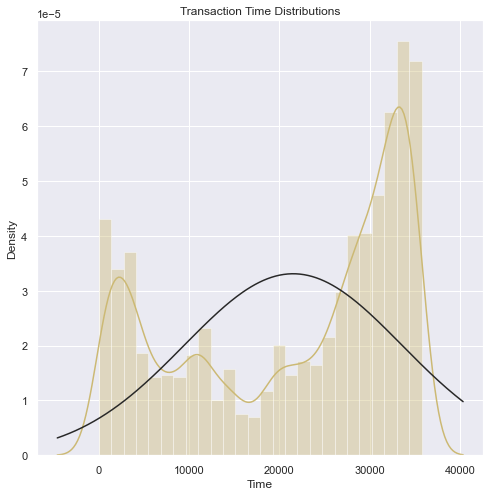

In [119]:
# Transaction Time Distribution
from scipy.stats import norm
plt.figure(figsize=(8,8))
plt.title('Transaction Time Distributions')

sns.distplot(df['Time'],fit=norm,color='y')

plt.show()

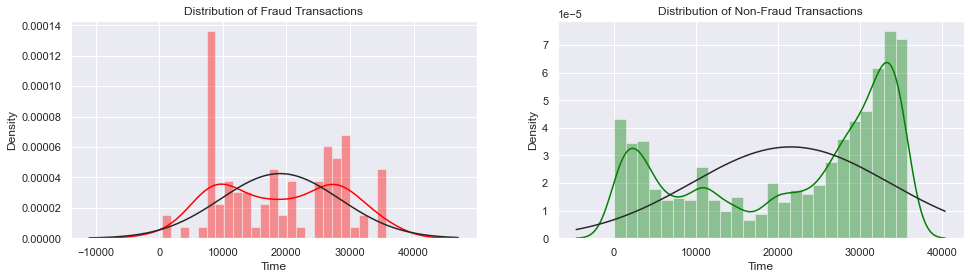

In [120]:
# Fraud Time Distribution

fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['Class'] == 1)]['Time'],bins=25,color='red', ax=axs[0],fit=norm)
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['Class'] == 0)]['Time'], bins=25,color='green', ax=axs[1],fit=norm)
axs[1].set_title("Distribution of Non-Fraud Transactions")

plt.show()

## <a name="6">Scaling the amount:</a>

In [121]:
df['amount_log'] = np.log(df.Amount + 0.01) # Scale amount by log

ss = StandardScaler()
df['amount_scaled'] = ss.fit_transform(df['Amount'].values.reshape(-1,1)) #Scale amount by Standardization

norm = MinMaxScaler()
df['amount_minmax'] = norm.fit_transform(df['Amount'].values.reshape(-1,1)) #Scale amount by Normalization

## <a name="7">Data spliting:</a>

In [122]:
X = df.drop(['Class','Amount','amount_minmax','amount_log'],axis=1) #remove those rows, we use amount_scaled instead of amount
y = df['Class'] # we will use y to compare it with the input


# we allocate 80% of the data for training and the remaining for testing
#X_train == training input, X_test == testing input, y_train == training output, y_test == testing output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True) 

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)
print('\n')
print('............')
print('\n')


#duplicate examples from the fraud class (minority) to balance the data

smote= SMOTE(sampling_strategy='minority')
X_train_smote,y_train_smote=smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = X_test, y_test

print("X_train_smote: ",X_train_smote.shape)
print("y_train_smote: ",y_train_smote.shape)
print("X_test_smote: ",X_test_smote.shape)
print("y_test_smote: ",y_test_smote.shape)




X_train:  (24000, 30)
y_train:  (24000,)
X_test:  (6000, 30)
y_test:  (6000,)


............


X_train_smote:  (47856, 30)
y_train_smote:  (47856,)
X_test_smote:  (6000, 30)
y_test_smote:  (6000,)


## <a name="8">The Metrics:</a>

In [123]:

#store the results here for later comparaison
names=[]
aucs_tests = []   #AUC-ROC CURVE https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
accuracy_tests = []
precision_tests = []
recall_tests = []
f1_score_tests = []
mcc_score_tests = []
balanced_accuracy_tests = []
top_k_accuracy_tests = []
cohen_kappa_tests = []

# confusion matrix plot
def confusion_matrix_plot(y_test, y_test_pred):
  confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred) 
  plt.clf()
  plt.imshow(confusion_matrix, cmap=plt.cm.Accent)
  categoryNames = ['non fraud','fraud']
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames,color='brown')
  plt.yticks(ticks, categoryNames,color='brown')
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]),fontsize=16,color='white')
  plt.show()


# calculate the peformance of each classification methode with 9 different metrics

def performance(model):
    
    for name, model, X_train, y_train, X_test, y_test in model:
        
        #appending name
        names.append(name)
        
        # Build model
        model.fit(X_train, y_train)
        
        #predictions
        y_test_pred = model.predict(X_test)
        
        # calculate accuracy
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_tests.append(Accuracy_test)
        
        # calculate auc
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_tests.append(Aucs_test)
        
        #precision_calculation
        Precision_score_test = metrics.precision_score(y_test , y_test_pred)
        precision_tests.append(Precision_score_test)
        
        # calculate recall
        Recall_score_test = metrics.recall_score(y_test , y_test_pred)
        recall_tests.append(Recall_score_test)
        
        #calculating F1
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_score_tests.append(F1Score_test)
        
        #calculating MCC
        MCC_score_tests = metrics.matthews_corrcoef(y_test, y_test_pred)
        mcc_score_tests.append(MCC_score_tests)
        
        # calculating balanced accuracy score
        Balanced_Accuracy_test = metrics.balanced_accuracy_score(y_test,y_test_pred)
        balanced_accuracy_tests.append(Balanced_Accuracy_test)
        
        # calculating top k accuracy
        
        Top_K_Accuracy_test = metrics.top_k_accuracy_score(y_test,y_test_pred)
        top_k_accuracy_tests.append(Top_K_Accuracy_test)

        #calculating cohenvkappa score
        Cohen_kappa_test = metrics.cohen_kappa_score(y_test,y_test_pred)
        cohen_kappa_tests.append(Cohen_kappa_test)
        
        # draw confusion matrix
        confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred) 
        
        print("Model Name :", name)
        print('Test Accuracy : {0:0.5f}'.format(Accuracy_test))
        print('Top K Accuracy Score : {0:0.5f}'.format(Top_K_Accuracy_test))
        print('Balanced Accuracy : {0:0.5f}'.format(Balanced_Accuracy_test))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        print('Test Precision : {0:0.5f}'.format(Precision_score_test))
        print('Test Recall : {0:0.5f}'.format(Recall_score_test))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        print("Matthews correlation coefficient : {0:0.5f}".format(MCC_score_tests))
        print('Cohen Kappa Score : {0:0.5f}'.format(Cohen_kappa_test))
        print('Confusion Matrix : \n',  confusion_matrix)
#         confusion_matrix_plot(y_test, y_test_pred)
       
        print("\n")
        
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        threshold = thresholds[np.argmax(tpr-fpr)]
        print("threshold: ",threshold)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
        
        
    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()
    



## <a name="9">Classification algorithms:</a>

Logical Regression Classifier performance test is running...

Model Name : LR IMBALANCED
Test Accuracy : 0.99633
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.50000
Test AUC : 0.50000
Test Precision : 0.00000
Test Recall : 0.00000
Test F1 : 0.00000
Matthews correlation coefficient : 0.00000
Cohen Kappa Score : 0.00000
Confusion Matrix : 
 [[5978    0]
 [  22    0]]


threshold:  1
Model Name : LR SMOTE
Test Accuracy : 0.99083
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.85954
Test AUC : 0.85954
Test Precision : 0.24615
Test Recall : 0.72727
Test F1 : 0.36782
Matthews correlation coefficient : 0.41985
Cohen Kappa Score : 0.36433
Confusion Matrix : 
 [[5929   49]
 [   6   16]]


threshold:  1


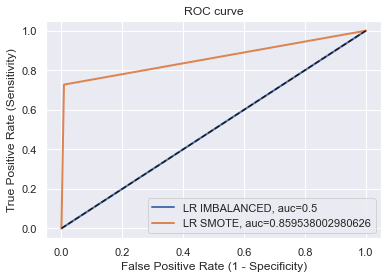

Time taken by Logical Regression Classifier is :       5.03s

****************************************


Random Forest Classifier performance test is running...

Model Name : RF IMABALANCED
Test Accuracy : 0.99917
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.88636
Test AUC : 0.88636
Test Precision : 1.00000
Test Recall : 0.77273
Test F1 : 0.87179
Matthews correlation coefficient : 0.87868
Cohen Kappa Score : 0.87138
Confusion Matrix : 
 [[5978    0]
 [   5   17]]


threshold:  1
Model Name : RF SMOTE
Test Accuracy : 0.99883
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.88620
Test AUC : 0.88620
Test Precision : 0.89474
Test Recall : 0.77273
Test F1 : 0.82927
Matthews correlation coefficient : 0.83093
Cohen Kappa Score : 0.82869
Confusion Matrix : 
 [[5976    2]
 [   5   17]]


threshold:  1


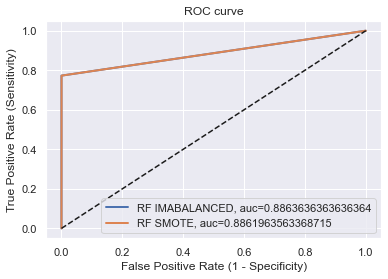

Time taken by Random Forest Classifier is :      20.75s

****************************************


Gaussian Naïve Bayes Classifier performance test is running...

Model Name : NB IMBALANCED
Test Accuracy : 0.98417
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.87884
Test AUC : 0.87884
Test Precision : 0.15888
Test Recall : 0.77273
Test F1 : 0.26357
Matthews correlation coefficient : 0.34603
Cohen Kappa Score : 0.25906
Confusion Matrix : 
 [[5888   90]
 [   5   17]]


threshold:  1
Model Name : NB SMOTE
Test Accuracy : 0.98367
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.87859
Test AUC : 0.87859
Test Precision : 0.15455
Test Recall : 0.77273
Test F1 : 0.25758
Matthews correlation coefficient : 0.34114
Cohen Kappa Score : 0.25301
Confusion Matrix : 
 [[5885   93]
 [   5   17]]


threshold:  1


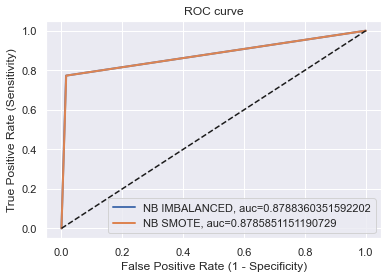

Time taken by Gaussian Naïve Bayes Classifier is :       0.31s

****************************************


Decision Tree Classifier performance test is running...

Model Name : DT IMBALANCED
Test Accuracy : 0.99850
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.86339
Test AUC : 0.86339
Test Precision : 0.84211
Test Recall : 0.72727
Test F1 : 0.78049
Matthews correlation coefficient : 0.78185
Cohen Kappa Score : 0.77974
Confusion Matrix : 
 [[5975    3]
 [   6   16]]


threshold:  1
Model Name : DT SMOTE
Test Accuracy : 0.99783
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.81776
Test AUC : 0.81776
Test Precision : 0.73684
Test Recall : 0.63636
Test F1 : 0.68293
Matthews correlation coefficient : 0.68369
Cohen Kappa Score : 0.68185
Confusion Matrix : 
 [[5973    5]
 [   8   14]]


threshold:  1


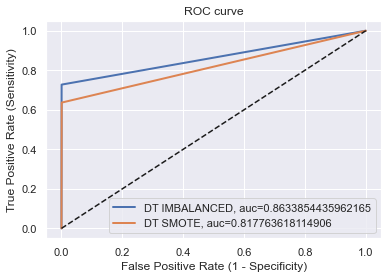

Time taken by Decision Tree Classifier is :       3.13s

****************************************


K-Nearest Neighbor Class performance test is running...

Model Name : KNN IMBALANCE
Test Accuracy : 0.99650
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.52273
Test AUC : 0.52273
Test Precision : 1.00000
Test Recall : 0.04545
Test F1 : 0.08696
Matthews correlation coefficient : 0.21283
Cohen Kappa Score : 0.08667
Confusion Matrix : 
 [[5978    0]
 [  21    1]]


threshold:  1
Model Name : KNN SMOTE
Test Accuracy : 0.98700
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.85761
Test AUC : 0.85761
Test Precision : 0.18182
Test Recall : 0.72727
Test F1 : 0.29091
Matthews correlation coefficient : 0.35960
Cohen Kappa Score : 0.28672
Confusion Matrix : 
 [[5906   72]
 [   6   16]]


threshold:  1


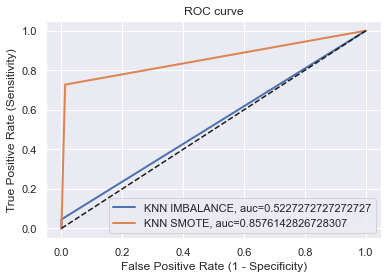

Time taken by K-Nearest Neighbor Class is :       2.24s

****************************************


XG Boost Classifier performance test is running...

Model Name : XGBOOST IMBALANCED
Test Accuracy : 0.99917
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.90901
Test AUC : 0.90901
Test Precision : 0.94737
Test Recall : 0.81818
Test F1 : 0.87805
Matthews correlation coefficient : 0.88001
Cohen Kappa Score : 0.87763
Confusion Matrix : 
 [[5977    1]
 [   4   18]]


threshold:  1
Model Name : XGBOOST SMOTE
Test Accuracy : 0.99867
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.95404
Test AUC : 0.95404
Test Precision : 0.76923
Test Recall : 0.90909
Test F1 : 0.83333
Matthews correlation coefficient : 0.83560
Cohen Kappa Score : 0.83267
Confusion Matrix : 
 [[5972    6]
 [   2   20]]


threshold:  1


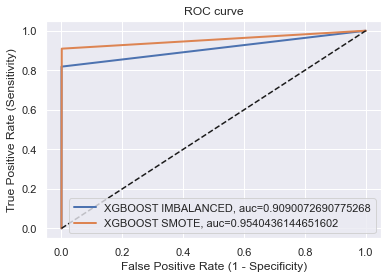

Time taken by XG Boost Classifier is :      38.98s

****************************************


MLP Classifier performance test is running...

Model Name : MLPClassifier IMBALANCE
Test Accuracy : 0.99617
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.77164
Test AUC : 0.77164
Test Precision : 0.48000
Test Recall : 0.54545
Test F1 : 0.51064
Matthews correlation coefficient : 0.50977
Cohen Kappa Score : 0.50872
Confusion Matrix : 
 [[5965   13]
 [  10   12]]


threshold:  1
Model Name : MLPClassifier SMOTE
Test Accuracy : 0.96033
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.93481
Test AUC : 0.93481
Test Precision : 0.07812
Test Recall : 0.90909
Test F1 : 0.14388
Matthews correlation coefficient : 0.26007
Cohen Kappa Score : 0.13806
Confusion Matrix : 
 [[5742  236]
 [   2   20]]


threshold:  1


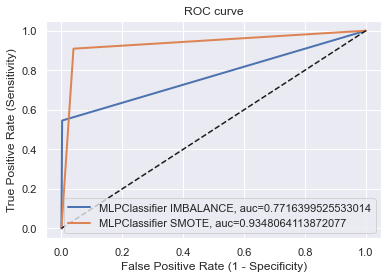

Time taken by MLP Classifier is :      17.20s

****************************************


LinearSVC performance test is running...

Model Name : LinearSVC IMBALANCE
Test Accuracy : 0.99683
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.77197
Test AUC : 0.77197
Test Precision : 0.57143
Test Recall : 0.54545
Test F1 : 0.55814
Matthews correlation coefficient : 0.55670
Cohen Kappa Score : 0.55655
Confusion Matrix : 
 [[5969    9]
 [  10   12]]


threshold:  1
Model Name : LinearSVC SMOTE
Test Accuracy : 0.99733
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.84016
Test AUC : 0.84016
Test Precision : 0.62500
Test Recall : 0.68182
Test F1 : 0.65217
Matthews correlation coefficient : 0.65146
Cohen Kappa Score : 0.65084
Confusion Matrix : 
 [[5969    9]
 [   7   15]]


threshold:  1


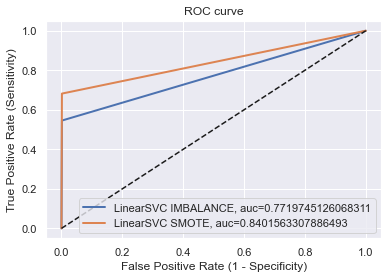

Time taken by LinearSVC is :       9.87s

****************************************




In [124]:
time_result=[]
list_of_models = ['Logical Regression Classifier','Random Forest Classifier','Gaussian Naïve Bayes Classifier',
                 'Decision Tree Classifier','K-Nearest Neighbor Class','XG Boost Classifier','MLP Classifier'
                 ,'LinearSVC']
i = 0

#Testing2
# n_estimators = 10
# Testingclassifier2=[]
# start_time = time.time()
# Testingclassifier2.append(('SVMclassifier IMBALANCE', OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators)),X_train,y_train,X_test,y_test))
# Testingclassifier2.append(('SVMclassifier SMOTE',OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators)),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
# print('starting...')
# performance(Testingclassifier2)
# print(cl('Time taken by Testingclassifier2  is : {:10.2f}s\n'.format(time.time() - start_time),attrs = ['bold'],color='green'))
# print(cl('*',color='green')*40 + '\n\n')
# time_result.append({'SVM(SVC)':time.time() - start_time})




# 1. Logical Regression Classifier


LRmodel=[]
start_time = time.time()
LRmodel.append(('LR IMBALANCED', LogisticRegression(solver='saga',multi_class='multinomial'),X_train, y_train, X_test, y_test))
LRmodel.append(('LR SMOTE', LogisticRegression(solver='saga',multi_class='multinomial'),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
print(cl('{} performance test is running...\n'.format(list_of_models[i]),attrs = ['bold'],color='blue'))
performance(LRmodel)

print(cl('Time taken by {} is : {:10.2f}s\n'.format(list_of_models[i],time.time() - start_time),attrs = ['bold'],color='green'))
print(cl('*',color='green')*40+'\n\n')
time_result.append(time.time() - start_time)
i = i + 1
# 2. Random Forest Classifier

RFmodel = []
start_time = time.time()
RFmodel.append(('RF IMABALANCED', RandomForestClassifier(),X_train,y_train,X_test,y_test))
RFmodel.append(('RF SMOTE', RandomForestClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
print(cl('{} performance test is running...\n'.format(list_of_models[i]),attrs = ['bold'],color='blue'))
performance(RFmodel)

print(cl('Time taken by {} is : {:10.2f}s\n'.format(list_of_models[i],time.time() - start_time),attrs = ['bold'],color='green'))
print(cl('*',color='green')*40 + '\n\n')
time_result.append(time.time() - start_time)
i = i + 1
# 3. Gaussian Naïve Bayes Classifier

NBmodel = []
start_time = time.time()
NBmodel.append(('NB IMBALANCED', GaussianNB(),X_train,y_train,X_test,y_test))
NBmodel.append(('NB SMOTE', GaussianNB(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
print(cl('{} performance test is running...\n'.format(list_of_models[i]),attrs = ['bold'],color='blue'))
performance(NBmodel)

print(cl('Time taken by {} is : {:10.2f}s\n'.format(list_of_models[i],time.time() - start_time),attrs = ['bold'],color='green'))
print(cl('*',color='green')*40 + '\n\n')
time_result.append(time.time() - start_time)
i = i + 1
# 4. Decision Tree Classifier

DTmodel = []
start_time = time.time()
DTmodel.append(('DT IMBALANCED', DecisionTreeClassifier(),X_train,y_train,X_test,y_test))
DTmodel.append(('DT SMOTE', DecisionTreeClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
print(cl('{} performance test is running...\n'.format(list_of_models[i]),attrs = ['bold'],color='blue'))
performance(DTmodel)

print(cl('Time taken by {} is : {:10.2f}s\n'.format(list_of_models[i],time.time() - start_time),attrs = ['bold'],color='green'))
print(cl('*',color='green')*40 + '\n\n')
time_result.append(time.time() - start_time)
i = i + 1
# 5. K-Nearest Neighbor Class

KNNmodel = []
start_time = time.time()
KNNmodel.append(('KNN IMBALANCE', KNeighborsClassifier(),X_train,y_train,X_test,y_test))
KNNmodel.append(('KNN SMOTE', KNeighborsClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
print(cl('{} performance test is running...\n'.format(list_of_models[i]),attrs = ['bold'],color='blue'))
performance(KNNmodel)

print(cl('Time taken by {} is : {:10.2f}s\n'.format(list_of_models[i],time.time() - start_time),attrs = ['bold'],color='green'))
print(cl('*',color='green')*40 + '\n\n')
time_result.append(time.time() - start_time)
i = i + 1
# 6. XG Boost Classifier

xgBOOST=[]
start_time = time.time()
xgBOOST.append(('XGBOOST IMBALANCED', XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580),X_train, y_train, X_test, y_test))
xgBOOST.append(('XGBOOST SMOTE', XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
print(cl('{} performance test is running...\n'.format(list_of_models[i]),attrs = ['bold'],color='blue'))
performance(xgBOOST)

print(cl('Time taken by {} is : {:10.2f}s\n'.format(list_of_models[i],time.time() - start_time),attrs = ['bold'],color='green'))
print(cl('*',color='green')*40 + '\n\n')
time_result.append(time.time() - start_time)
i = i + 1
# 7. MLP Classifier

MLPclassifier=[]
start_time = time.time()
MLPclassifier.append(('MLPClassifier IMBALANCE', MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000),X_train,y_train,X_test,y_test))
MLPclassifier.append(('MLPClassifier SMOTE',MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
print(cl('{} performance test is running...\n'.format(list_of_models[i]),attrs = ['bold'],color='blue'))
performance(MLPclassifier)

print(cl('Time taken by {} is : {:10.2f}s\n'.format(list_of_models[i],time.time() - start_time),attrs = ['bold'],color='green'))
print(cl('*',color='green')*40 + '\n\n')
time_result.append(time.time() - start_time)
i = i + 1
#8. SVM(SVC)

# SVMclassifier=[]
# start_time = time.time()
# SVMclassifier.append(('SVMclassifier IMBALANCE', SVC(kernel='sigmoid', random_state=77,cache_size=1000),X_train,y_train,X_test,y_test))
# SVMclassifier.append(('SVMclassifier SMOTE',SVC(kernel='sigmoid', random_state=77,cache_size=1000),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
# print(cl('{} performance test is running...\n'.format(list_of_models[i]),attrs = ['bold'],color='blue'))
# performance(SVMclassifier)

# print(cl('Time taken by {} is : {:10.2f}s\n'.format(list_of_models[i],time.time() - start_time),attrs = ['bold'],color='green'))
# print(cl('*',color='green')*40 + '\n\n')
# time_result.append({'SVM(SVC)':time.time() - start_time})
# i = i + 1
#Randomness of the underlying implementations: The underlying implementations of 
#SVC and NuSVC use a random number generator only to shuffle the data for probability estimation (when probability is set to True)


#8. LinearSVC


LSVC=[]
start_time = time.time()
LSVC.append(('LinearSVC IMBALANCE', LinearSVC(random_state=0, tol=1e-5),X_train,y_train,X_test,y_test))
LSVC.append(('LinearSVC SMOTE',LinearSVC(random_state=0, tol=1e-5),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
print(cl('{} performance test is running...\n'.format(list_of_models[i]),attrs = ['bold'],color='blue'))
performance(LSVC)

print(cl('Time taken by {} is : {:10.2f}s\n'.format(list_of_models[i],time.time() - start_time),attrs = ['bold'],color='green'))
print(cl('*',color='green')*40 + '\n\n')
time_result.append(time.time() - start_time)
i = i + 1






In [125]:
# COMPARE MCC SCORE FOR ALL DATASETS
comparison={
    'Model': names,
    'Accuracy': accuracy_tests,
    'AUC': aucs_tests,
    'Precision Score' : precision_tests,
    'Recall Score': recall_tests, 
    'F1 Score': f1_score_tests,
    "Balanced Accuracy": balanced_accuracy_tests,
    "Top K Accuracy": top_k_accuracy_tests,
    "Cohen Kappa Score": cohen_kappa_tests,
    'MCC Score': mcc_score_tests,
}

print(cl("Comparing performance of various Classifiers sorted by MCC Score : ",attrs=['bold'],color='blue'))
comparison=pd.DataFrame(comparison)
comparison.sort_values('MCC Score',ascending=False)

Comparing performance of various Classifiers sorted by MCC Score : 


,Model,Accuracy,AUC,Precision Score,Recall Score,F1 Score,Balanced Accuracy,Top K Accuracy,Cohen Kappa Score,MCC Score
10,XGBOOST IMBALANCED,0.999167,0.909007,0.947368,0.818182,0.878049,0.909007,1.0,0.877633,0.880008
2,RF IMABALANCED,0.999167,0.886364,1.000000,0.772727,0.871795,0.886364,1.0,0.871384,0.878682
11,XGBOOST SMOTE,0.998667,0.954044,0.769231,0.909091,0.833333,0.954044,1.0,0.832669,0.835598
3,RF SMOTE,0.998833,0.886196,0.894737,0.772727,0.829268,0.886196,1.0,0.828686,0.830929
6,DT IMBALANCED,0.998500,0.863385,0.842105,0.727273,0.780488,0.863385,1.0,0.779739,0.781849
7,DT SMOTE,0.997833,0.817764,0.736842,0.636364,0.682927,0.817764,1.0,0.681846,0.683691
15,LinearSVC SMOTE,0.997333,0.840156,0.625000,0.681818,0.652174,0.840156,1.0,0.650838,0.651459
14,LinearSVC IMBALANCE,0.996833,0.771975,0.571429,0.545455,0.558140,0.771975,1.0,0.556551,0.556703
12,MLPClassifier IMBALANCE,0.996167,0.771640,0.480000,0.545455,0.510638,0.771640,1.0,0.508722,0.509770
1,LR SMOTE,0.990833,0.859538,0.246154,0.727273,0.367816,0.859538,1.0,0.364333,0.419853


In [126]:
# COMPARE Accuracy SCORE FOR ALL DATASETS
comparison={
    'Model': names,
    'AUC': aucs_tests,
    'Precision Score' : precision_tests,
    'Recall Score': recall_tests, 
    'F1 Score': f1_score_tests,
    "Balanced Accuracy": balanced_accuracy_tests,
    "Top K Accuracy": top_k_accuracy_tests,
    "Cohen Kappa Score": cohen_kappa_tests,
    'MCC Score': mcc_score_tests,
    'Accuracy': accuracy_tests,
}

print(cl("Comparing performance of various Classifiers sorted by Accuracy : ",attrs=['bold'],color='blue'))
comparison=pd.DataFrame(comparison)
comparison.sort_values('Accuracy',ascending=False)

Comparing performance of various Classifiers sorted by Accuracy : 


,Model,AUC,Precision Score,Recall Score,F1 Score,Balanced Accuracy,Top K Accuracy,Cohen Kappa Score,MCC Score,Accuracy
2,RF IMABALANCED,0.886364,1.000000,0.772727,0.871795,0.886364,1.0,0.871384,0.878682,0.999167
10,XGBOOST IMBALANCED,0.909007,0.947368,0.818182,0.878049,0.909007,1.0,0.877633,0.880008,0.999167
3,RF SMOTE,0.886196,0.894737,0.772727,0.829268,0.886196,1.0,0.828686,0.830929,0.998833
11,XGBOOST SMOTE,0.954044,0.769231,0.909091,0.833333,0.954044,1.0,0.832669,0.835598,0.998667
6,DT IMBALANCED,0.863385,0.842105,0.727273,0.780488,0.863385,1.0,0.779739,0.781849,0.998500
7,DT SMOTE,0.817764,0.736842,0.636364,0.682927,0.817764,1.0,0.681846,0.683691,0.997833
15,LinearSVC SMOTE,0.840156,0.625000,0.681818,0.652174,0.840156,1.0,0.650838,0.651459,0.997333
14,LinearSVC IMBALANCE,0.771975,0.571429,0.545455,0.558140,0.771975,1.0,0.556551,0.556703,0.996833
8,KNN IMBALANCE,0.522727,1.000000,0.045455,0.086957,0.522727,1.0,0.086665,0.212827,0.996500
0,LR IMBALANCED,0.500000,0.000000,0.000000,0.000000,0.500000,1.0,0.000000,0.000000,0.996333


In [127]:
comparison={
    'Model':list_of_models ,
    'Time': time_result,
   
}
 
print(cl("Comparing time needed for every model : ",attrs=['bold'],color='blue'))
comparison=pd.DataFrame(comparison)
comparison.sort_values('Time',ascending=False)


Comparing time needed for every model : 


,Model,Time
5,XG Boost Classifier,38.983218
1,Random Forest Classifier,20.753710
6,MLP Classifier,17.205492
7,LinearSVC,9.866258
0,Logical Regression Classifier,5.033175
3,Decision Tree Classifier,3.132158
4,K-Nearest Neighbor Class,2.242695
2,Gaussian Naïve Bayes Classifier,0.310462


In [128]:
print(cl('#',color='green')*40 + '\n')
print(cl('Time taken by the program is : {:10.2f}s\n'.format(time.time() - total_time),attrs = ['bold'],color='green'))
print(cl('#',color='green')*40 + '\n')

########################################

Time taken by the program is :     100.96s

########################################



## <a name="11">Useful links:</a>

1. [handling unbalanced data](https://medium.com/analytics-vidhya/handling-imbalanced-dataset-522dfcae4a3c)
2. [oversimpling vs undersimpling](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/#:~:text=Imbalanced%20datasets%20are,class%2C%20called%20oversampling.)
3. [list of metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)
